# Import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [4]:
# Path to our data 
PATH = "/content/drive/My Drive/Github/CLASSIC_ML/Regression/data/"

# Load data

In [5]:
df = pd.read_csv(PATH+"cars.csv", sep = ",",encoding='cp1251')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,7,9,12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;


In [6]:
df.shape

(371824, 20)

# Fix data

Need to parse rows with error where all data in one column  

In [7]:
# Find all rows which have all Nan columns except the first column
df['ERROR_PARS_ROW'] = df['dateCrawled'].apply(lambda x: 1 if len(x.split(','))>1 else 0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;,ERROR_PARS_ROW
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,...,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;,0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;,0
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,...,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,...,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;,0


In [8]:
# Save rows with in separate dataframe  
df_errors_rows = df[df['ERROR_PARS_ROW']==1]

print(df_errors_rows.shape)
df_errors_rows.head()

(2619, 21)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;,ERROR_PARS_ROW
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12,"2016-03-15 22:49:09,VW_Passat_Facelift_35i__""7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
212,"2016-03-27 23:48:09,Audi_A3_2.0_TDI_Sportback_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
216,"2016-04-05 11:48:01,BMW_130i_LCI_M_Paket_ab_We...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
274,"2016-03-11 00:55:09,BMW_730d_VOLLAUSSTATTUNG__...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
# Parsing 
df_errors_rows_clear = df_errors_rows['dateCrawled'].apply(lambda x: pd.Series(x.split(sep=",")))
df_errors_rows_clear['ERROR_PARS_ROW'] = 0 
df_errors_rows_clear.columns = df_errors_rows.columns

print(df_errors_rows_clear.shape)
df_errors_rows_clear.head()

(2619, 21)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;,ERROR_PARS_ROW
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46;;;;;;;;,0
12,2016-03-15 22:49:09,"VW_Passat_Facelift_35i__""7Sitzer""",privat,Angebot,999,control,kombi,1995,manuell,115,...,150000,11,benzin,volkswagen,,2016-03-15 00:00:00,0,37269,2016-04-01 13:16:16;;;;;;;;,0
212,2016-03-27 23:48:09,Audi_A3_2.0_TDI_Sportback_DPF_S_tronic_Navi_Xe...,privat,Angebot,12899,test,kombi,2009,automatik,140,...,150000,9,diesel,audi,nein,2016-03-27 00:00:00,0,51109,2016-04-06 02:15:20;;;;;;;;,0
216,2016-04-05 11:48:01,BMW_130i_LCI_M_Paket_ab_Werk_Xenon_Schiebedach...,privat,Angebot,14900,test,limousine,2007,manuell,265,...,150000,10,benzin,bmw,nein,2016-04-05 00:00:00,0,14129,2016-04-05 11:48:01;;;;;;;;,0
274,2016-03-11 00:55:09,"BMW_730d_VOLLAUSSTATTUNG__E38_""2.Hand""",privat,Angebot,5900,test,limousine,1999,automatik,184,...,150000,10,diesel,bmw,nein,2016-03-10 00:00:00,0,09405,2016-04-05 23:46:27;;;;;;;;,0


In [10]:
# Delete row with errors from initial df - Choose only correct ones

cnt_rows_initally = df.shape[0]

df = df[df['ERROR_PARS_ROW']==0].copy()

cnt_correct_rows = df.shape[0]

print("Deleted rows:", cnt_rows_initally - cnt_correct_rows)

del cnt_rows_initally, cnt_correct_rows

print(df.shape)

df.head()

Deleted rows: 2619
(369205, 21)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;,ERROR_PARS_ROW
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,...,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57;;;;;;;;,0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50;;;;;;;;,0
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,...,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17;;;;;;;;,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,...,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21;;;;;;;;,0
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,...,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07;;;;;;;;,0


In [11]:
# Add fixed rows 
df = df.append(df_errors_rows_clear)
df.shape

(371824, 21)

In [12]:
# Drop duplicates
df.drop_duplicates(keep=False, inplace = True)
df.shape

(371818, 21)

In [13]:
 # Reset index
 df = df.reset_index(drop=True)

In [14]:
# Delete column 
df = df.drop(columns=['ERROR_PARS_ROW'])
df.shape

(371818, 20)

In [15]:
# Fix "lastSeen" column
df['lastSeen;;;;;;;;']=df['lastSeen;;;;;;;;'].str.replace(';','')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07


In [16]:
# Change last column name 
df.rename(columns = {'lastSeen;;;;;;;;': 'lastSeen'}, inplace =True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371818 entries, 0 to 371817
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371818 non-null  object
 1   name                 371818 non-null  object
 2   seller               371812 non-null  object
 3   offerType            371812 non-null  object
 4   price                371812 non-null  object
 5   abtest               371812 non-null  object
 6   vehicleType          334074 non-null  object
 7   yearOfRegistration   371812 non-null  object
 8   gearbox              351652 non-null  object
 9   powerPS              371812 non-null  object
 10  model                351389 non-null  object
 11  kilometer            371812 non-null  object
 12  monthOfRegistration  371812 non-null  object
 13  fuelType             338539 non-null  object
 14  brand                371812 non-null  object
 15  notRepairedDamage    300073 non-nu

In [18]:
# Make copy for any purpose 
df_copy = df.copy() 

In [19]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07


# Data preparation

In [20]:
# Features info
def get_info(df):
  return pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

In [21]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280649,object
1,name,0,233703,object
2,seller,6,2,object
3,offerType,6,2,object
4,price,6,8408,object
5,abtest,6,2,object
6,vehicleType,37744,9,object
7,yearOfRegistration,6,261,object
8,gearbox,20166,3,object
9,powerPS,6,1275,object


In [22]:
# Where price is Nan 
df[df['price'].isna()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
370245,2016-03-30 15:47:55,"Polo_86_c__""Nicht_im_Abgassskandal_verwickelt_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370711,2016-03-30 22:56:39,"C180_T_im_""Rat_Look"".._laeuft_gut;__Tuev_noch_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370769,2016-03-12 13:52:03,"Peugeot__1o6___Sport____""_____Klima_____Teile_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370897,2016-03-15 21:52:10,"VW_Passat_3B_1.8Turbo_K04_3""__kein_GTI;R32;VR6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371081,2016-03-21 13:58:37,"Golf_IV_1.4__17""MAM_Felgen__Gewindefahrwerk___...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371360,2016-03-31 14:57:12,"Ford_Mondeo_nach_Ьberschlag_mit_""leichtem_Blec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Delete rows with Nan price
df = df[df['price'].isna()==False]
print(df.shape)

df.head()


(371812, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435.0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954.0,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074.0,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437.0,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775.0,2016-04-06 19:17:07


In [24]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280646,object
1,name,0,233697,object
2,seller,0,2,object
3,offerType,0,2,object
4,price,0,8408,object
5,abtest,0,2,object
6,vehicleType,37738,9,object
7,yearOfRegistration,0,261,object
8,gearbox,20160,3,object
9,powerPS,0,1275,object


In [25]:
# Change types

# int 
cols_int_types = ['yearOfRegistration', 'monthOfRegistration', 'nrOfPictures', 'postalCode'] 

for col in cols_int_types:
  df[col] = df[col].astype('int')

In [26]:
# float 
cols_float_types = ['price', 'powerPS', 'kilometer'] 

for col in cols_float_types:
  df[col] = df[col].astype('float')

In [27]:
# datetime 
cols_dt_types = ['dateCrawled', 'dateCreated', 'lastSeen'] 

for col in cols_dt_types:
  df[col] = pd.to_datetime(df[col], format=('%Y-%m-%dT%H:%M:%S'), errors='ignore')

In [28]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


In [29]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280646,object
1,name,0,233697,object
2,seller,0,2,object
3,offerType,0,2,object
4,price,0,5597,float64
5,abtest,0,2,object
6,vehicleType,37738,9,object
7,yearOfRegistration,0,155,int64
8,gearbox,20160,3,object
9,powerPS,0,794,float64


Have a look on features

## View "vehicleType" column

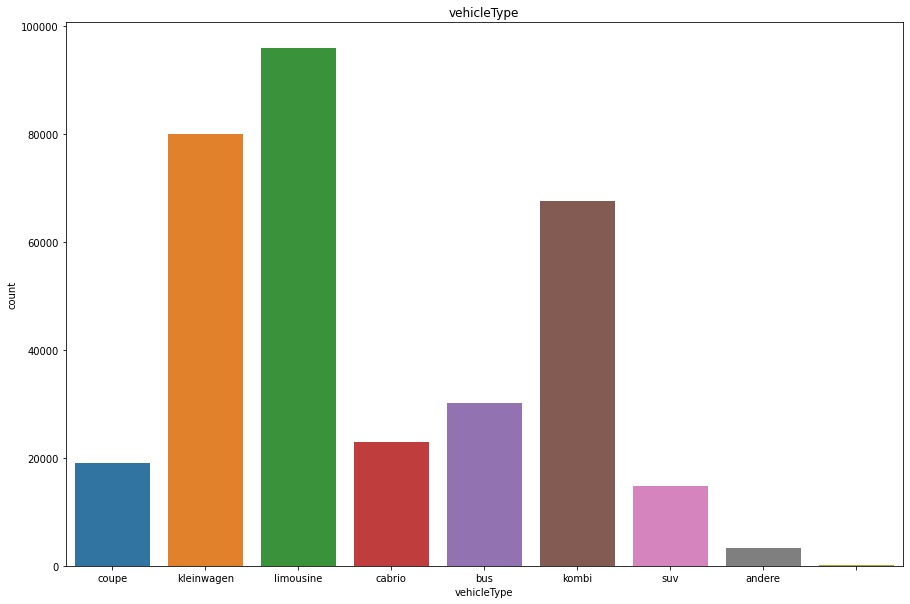

In [30]:
plt.figure(figsize=(15,10)) 
plt.title(u'vehicleType')
sns.countplot(x=df["vehicleType"]); 

Check empty type

In [31]:
df[df['vehicleType']==''].shape

(160, 20)

In [32]:
# Delete rows
df = df[df['vehicleType']!='']
print(df.shape)

df.head()

(371652, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


## Fix and View "yearOfRegistration" column

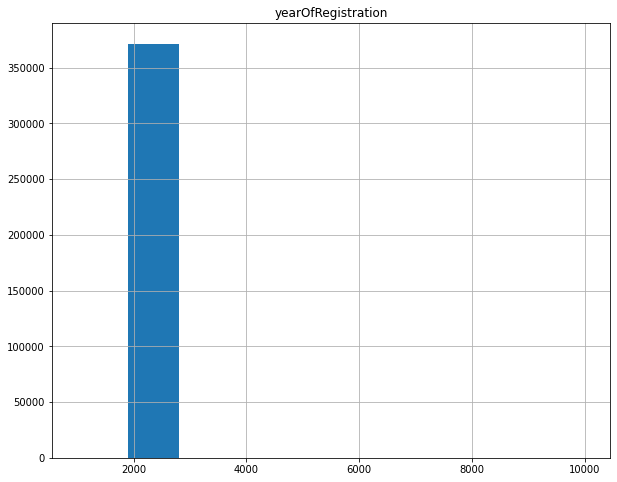

In [33]:
plt.figure(figsize=(10,8)) 
plt.title(u'yearOfRegistration')
df["yearOfRegistration"].hist(); 

There is a mistake here => We should delete rows with Year of Registartion > 2019

In [34]:
print(df[df["yearOfRegistration"] > 2019].shape)
df[df["yearOfRegistration"] > 2019].head()

(114, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
13486,2016-03-29 18:39:40,Verkaufe_DESIGN_Streifen_/_Aufkleber_VW__Opel_...,privat,Angebot,49.0,control,NaN,5000,NaN,0.0,golf,5000.0,12,NaN,volkswagen,NaN,2016-03-29,0,74523,2016-04-06 04:16:14
15782,2016-03-14 00:52:02,Alles_anbieten,privat,Angebot,0.0,control,NaN,9999,NaN,0.0,NaN,10000.0,0,NaN,sonstige_autos,NaN,2016-03-13,0,32689,2016-03-21 23:46:46
16541,2016-04-02 11:55:48,quad_neu_t?v_tauschen_gegen_Auto,privat,Angebot,1700.0,test,NaN,3200,NaN,0.0,NaN,5000.0,0,NaN,sonstige_autos,NaN,2016-04-02,0,33649,2016-04-06 09:46:13
17998,2016-03-23 16:43:29,Opel_GT_Karosserie_mit_Brief!,privat,Angebot,700.0,test,NaN,9999,NaN,0.0,andere,10000.0,0,NaN,opel,NaN,2016-03-23,0,21769,2016-04-05 20:16:15
18073,2016-03-06 16:06:20,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,privat,Angebot,6500.0,control,NaN,8888,NaN,0.0,NaN,10000.0,0,NaN,sonstige_autos,NaN,2016-03-06,0,55262,2016-03-30 20:46:55


In [35]:
df = df[df["yearOfRegistration"] <= 2019]
print(df.shape)

df.head()

(371538, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


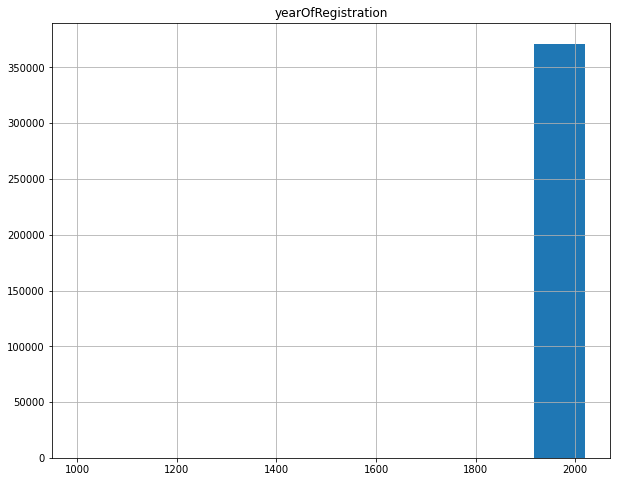

In [36]:
plt.figure(figsize=(10,8)) 
plt.title(u'yearOfRegistration')
df["yearOfRegistration"].hist(); 

Delete very old cars. The first car was build 1880s

In [37]:
print(df[df["yearOfRegistration"] < 1880].shape)
df[df["yearOfRegistration"] < 1880].head()

(67, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
642,2016-03-16 16:55:09,195/55_r15_sommerreifen_alu,privat,Angebot,0.0,control,NaN,1111,NaN,0.0,NaN,5000.0,0,NaN,opel,NaN,2016-03-16,0,44628,2016-03-20 16:44:37
16741,2016-03-29 23:42:16,Ford_mondeo_mk3_2.0tdc?_tubo_lader,privat,Angebot,190.0,control,NaN,1000,NaN,0.0,mondeo,5000.0,0,NaN,ford,NaN,2016-03-29,0,47166,2016-04-06 10:44:58
18996,2016-03-09 17:49:44,Subaru_Impreza_Wrx_2.0,privat,Angebot,7999.0,test,NaN,1500,manuell,224.0,impreza,5000.0,3,NaN,subaru,NaN,2016-03-09,0,53577,2016-03-15 05:15:17
35700,2016-04-01 06:02:10,UNFAL_Auto,privat,Angebot,450.0,control,NaN,1800,NaN,1800.0,NaN,5000.0,2,NaN,mitsubishi,nein,2016-04-01,0,63322,2016-04-01 09:42:30
40435,2016-03-19 23:54:40,Suche_einen_Trabant_mit_12v,privat,Angebot,1234.0,control,NaN,1234,NaN,26.0,NaN,5000.0,1,NaN,trabant,NaN,2016-03-19,0,38518,2016-04-06 03:15:22


In [38]:
df = df[df["yearOfRegistration"] >= 1880]
print(df.shape)

df.head()

(371471, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


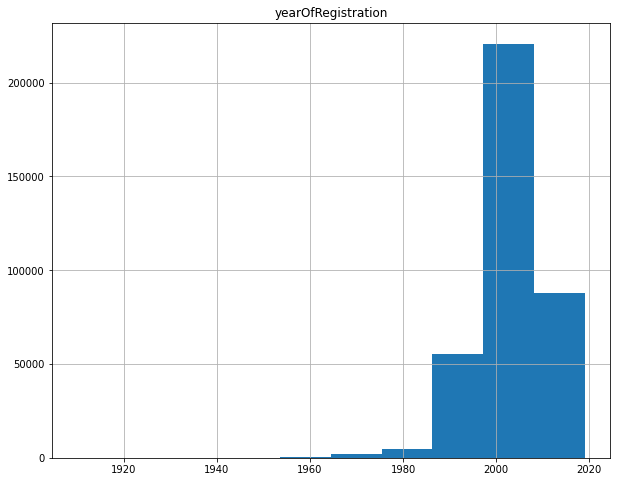

In [39]:
plt.figure(figsize=(10,8)) 
plt.title(u'yearOfRegistration')
df["yearOfRegistration"].hist(); 

almost normal distribution

## View "gearbox" column

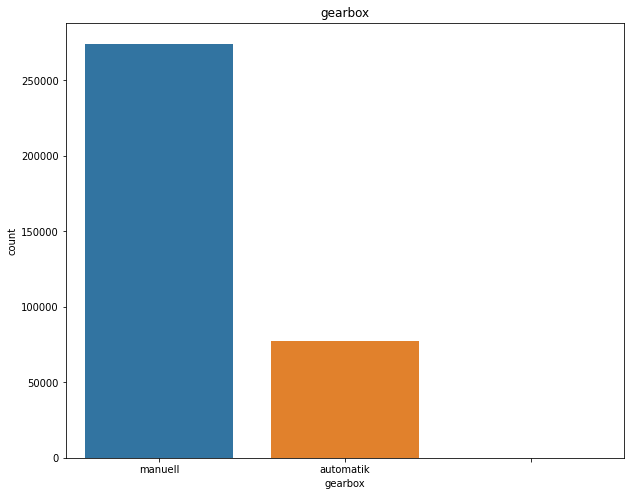

In [40]:
plt.figure(figsize=(10,8)) 
plt.title(u'gearbox')
sns.countplot(x=df["gearbox"]); 

delete empty rows

In [41]:
df[df['gearbox']==''].shape

(30, 20)

In [42]:
# Delete rows
df = df[df['gearbox']!='']
print(df.shape)

df.head()

(371441, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


## View "notRepairedDamage" column

In [43]:
df['notRepairedDamage'].value_counts()

nein    263291
ja       36277
           289
Name: notRepairedDamage, dtype: int64

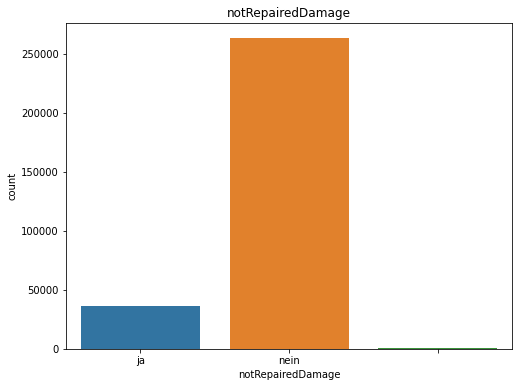

In [44]:
plt.figure(figsize=(8,6)) 
plt.title(u'notRepairedDamage')
sns.countplot(x=df["notRepairedDamage"]); 

delete empty rows

In [45]:
df[df['notRepairedDamage']==''].shape

(289, 20)

In [46]:
# Delete rows
df = df[df['notRepairedDamage']!='']
print(df.shape)

df.head()

(371152, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


## View "model" column

In [47]:
df['model'].value_counts()

golf               29999
andere             26376
3er                20555
polo               13087
corsa              12557
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 252, dtype: int64

## View "fuelType" column

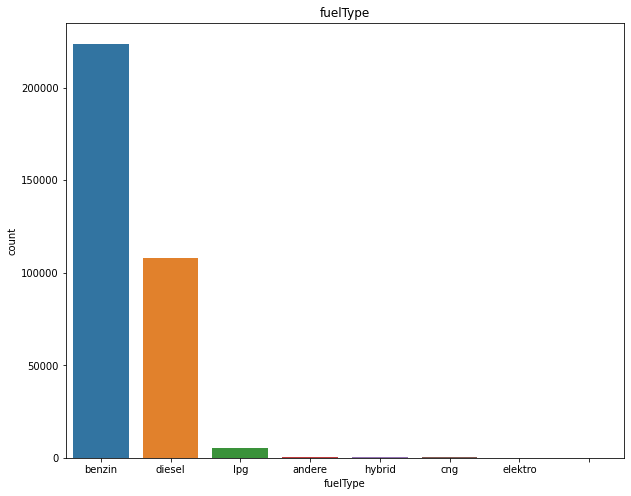

In [48]:
plt.figure(figsize=(10,8)) 
plt.title(u'fuelType')
sns.countplot(x=df["fuelType"]); 

delete empty rows

In [49]:
df[df['fuelType']==''].shape

(52, 20)

In [50]:
# Delete rows
df = df[df['fuelType']!='']
print(df.shape)

df.head()

(371100, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
3,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
4,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07


In [51]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280251,object
1,name,0,233031,object
2,seller,0,2,object
3,offerType,0,2,object
4,price,0,5594,float64
5,abtest,0,2,object
6,vehicleType,37557,8,object
7,yearOfRegistration,0,100,int64
8,gearbox,20017,2,object
9,powerPS,0,792,float64


In [52]:
# To delete
delete_cols = ['dateCrawled', 'name', 
               'nrOfPictures', 'dateCreated']

# Delete cols
df = df.drop(columns=delete_cols)
print(df.shape)

df.head()

(371100, 16)


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen
0,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,70435,2016-04-07 03:16:57
1,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,66954,2016-04-07 01:46:50
2,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,91074,2016-03-17 17:40:17
3,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,60437,2016-04-06 10:17:21
4,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,33775,2016-04-06 19:17:07


## "lastSeen" - make new columns days, months, years from last seen

In [53]:
df["days_from_last_seen"] = (pd.to_datetime(datetime.date.today()) - df["lastSeen"]) / np.timedelta64(1, 'D')
df["months_from_last_seen"] = (pd.to_datetime(datetime.date.today()) - df["lastSeen"]) / np.timedelta64(1, 'M')
df["years_from_last_seen"] = (pd.to_datetime(datetime.date.today()) - df["lastSeen"]) / np.timedelta64(1, 'Y')
df.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,lastSeen,days_from_last_seen,months_from_last_seen,years_from_last_seen
0,privat,Angebot,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,70435,2016-04-07 03:16:57,2404.863229,79.011503,6.584292
1,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,66954,2016-04-07 01:46:50,2404.925810,79.013559,6.584463
2,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,91074,2016-03-17 17:40:17,2425.263692,79.681757,6.640146
3,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,60437,2016-04-06 10:17:21,2405.571285,79.034766,6.586230
4,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,33775,2016-04-06 19:17:07,2405.196447,79.022450,6.585204


In [54]:
df = df.drop(columns=['lastSeen'])
print(df.shape)

(371100, 18)


In [55]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,seller,0,2,object
1,offerType,0,2,object
2,price,0,5594,float64
3,abtest,0,2,object
4,vehicleType,37557,8,object
5,yearOfRegistration,0,100,int64
6,gearbox,20017,2,object
7,powerPS,0,792,float64
8,model,20343,252,object
9,kilometer,0,13,float64


## Make "YearsFromRegistration"

In [56]:
df['yearsfromregistration'] = 2020 - df['yearOfRegistration'] 

## View "seller" column

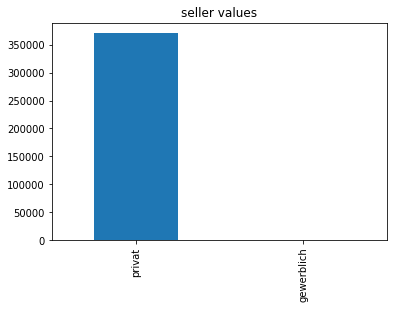

In [57]:
# Graph
df['seller'].value_counts().plot(kind='bar')

# Add title
plt.title(u'seller values');

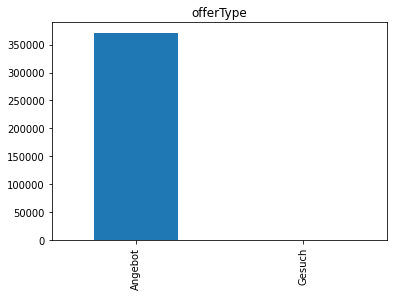

In [58]:
# Graph
df['offerType'].value_counts().plot(kind='bar')

# Add title 
plt.title(u'offerType');

Delete columns - all records with one value

In [59]:
df = df.drop(columns=['seller', 'offerType'])
print(df.shape)
df.head()

(371100, 17)


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration
0,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,70435,2404.863229,79.011503,6.584292,27
1,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,66954,2404.925810,79.013559,6.584463,9
2,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,91074,2425.263692,79.681757,6.640146,19
3,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,60437,2405.571285,79.034766,6.586230,12
4,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,33775,2405.196447,79.022450,6.585204,25


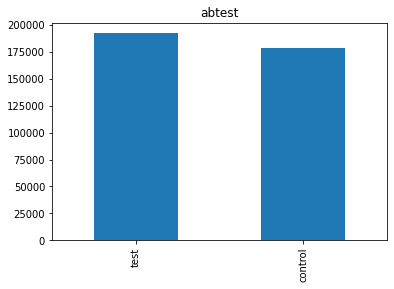

In [60]:
# Graph
df['abtest'].value_counts().plot(kind='bar')

# Add title 
plt.title(u'abtest');

## Brand - make new columns "top_brand" (top 1, 5, 10)

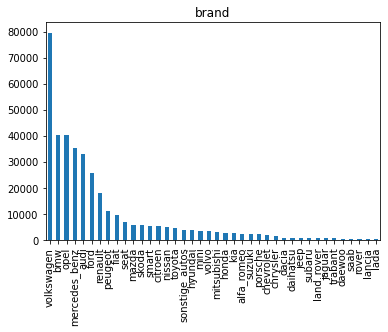

In [61]:
# Graph
df['brand'].value_counts().plot(kind='bar')

# Add title 
plt.title(u'brand');

In [62]:
top1 = df['brand'].value_counts().index[0]
top5 = df['brand'].value_counts().index[0:5].values.tolist()
top10 = df['brand'].value_counts().index[0:10].values.tolist()

In [63]:
df['top1_brand'] = df['brand'].apply(lambda x: 1 if x == top1 else 0)
df['top5_brand'] = df['brand'].apply(lambda x: 1 if x in top5 else 0)
df['top10_brand'] = df['brand'].apply(lambda x: 1 if x in top10 else 0)

In [64]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
0,480.0,test,NaN,1993,manuell,0.0,golf,150000.0,0,benzin,volkswagen,NaN,70435,2404.863229,79.011503,6.584292,27,1,1,1
1,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,66954,2404.925810,79.013559,6.584463,9,0,1,1
2,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,91074,2425.263692,79.681757,6.640146,19,1,1,1
3,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,60437,2405.571285,79.034766,6.586230,12,0,0,0
4,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,33775,2405.196447,79.022450,6.585204,25,0,1,1


# Divide features: 

In [65]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,5594,float64
1,abtest,0,2,object
2,vehicleType,37557,8,object
3,yearOfRegistration,0,100,int64
4,gearbox,20017,2,object
5,powerPS,0,792,float64
6,model,20343,252,object
7,kilometer,0,13,float64
8,monthOfRegistration,0,13,int64
9,fuelType,33138,7,object


In [66]:
# Delete 
delete_cols = ['yearOfRegistration', 'abtest', 'notRepairedDamage']

# Categorical
col_cat = ['seller', 'offerType', 'vehicleType', 'gearbox',
           'model', 'monthOfRegistration', 'fuelType',
           'brand', 'postalCode',
           'top1_brand', 'top5_brand', 'top10_brand']

# Numeric 
col_num = ['powerPS', 'kilometer', 'yearsfromregistration',
           'days_from_last_seen', 'months_from_last_seen', 'years_from_last_seen']

In [67]:
# Delete cols
df = df.drop(columns=delete_cols)
print(df.shape)

df.head()

(371100, 17)


,price,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
0,480.0,NaN,manuell,0.0,golf,150000.0,0,benzin,volkswagen,70435,2404.863229,79.011503,6.584292,27,1,1,1
1,18300.0,coupe,manuell,190.0,NaN,125000.0,5,diesel,audi,66954,2404.925810,79.013559,6.584463,9,0,1,1
2,1500.0,kleinwagen,manuell,75.0,golf,150000.0,6,benzin,volkswagen,91074,2425.263692,79.681757,6.640146,19,1,1,1
3,3600.0,kleinwagen,manuell,69.0,fabia,90000.0,7,diesel,skoda,60437,2405.571285,79.034766,6.586230,12,0,0,0
4,650.0,limousine,manuell,102.0,3er,150000.0,10,benzin,bmw,33775,2405.196447,79.022450,6.585204,25,0,1,1


# Replace Nan 

In [68]:
# features with nan 
cols_nan = get_info(df)[get_info(df)['NaN_count'] != 0]['Feature'].values.tolist()
cols_nan

['vehicleType', 'gearbox', 'model', 'fuelType']

In [69]:
for i in cols_nan: 
  df[i] = df[i].fillna('unknown')

In [70]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,5594,float64
1,vehicleType,0,9,object
2,gearbox,0,3,object
3,powerPS,0,792,float64
4,model,0,253,object
5,kilometer,0,13,float64
6,monthOfRegistration,0,13,int64
7,fuelType,0,8,object
8,brand,0,40,object
9,postalCode,0,8151,int64


# Data info and Feature description 

In [71]:
df.describe()

,price,powerPS,kilometer,monthOfRegistration,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
count,3.711000e+05,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000,371100.000000
mean,1.727397e+04,115.549652,125684.936675,5.737982,50828.982714,2412.848131,79.273846,6.606154,16.652832,0.214239,0.614317,0.806182
std,3.589975e+06,191.896345,40026.949792,3.711389,25800.082507,9.139089,0.300264,0.025022,7.770520,0.410294,0.486757,0.395289
min,0.000000e+00,0.000000,5000.000000,0.000000,1067.000000,2404.375799,78.995488,6.582957,1.000000,0.000000,0.000000,0.000000
25%,1.150000e+03,70.000000,125000.000000,3.000000,30459.000000,2405.552049,79.034134,6.586178,12.000000,0.000000,0.000000,1.000000
50%,2.950000e+03,105.000000,150000.000000,6.000000,49624.000000,2408.029369,79.115526,6.592960,17.000000,0.000000,1.000000,1.000000
75%,7.200000e+03,150.000000,150000.000000,9.000000,71560.000000,2419.515055,79.492887,6.624407,21.000000,0.000000,1.000000,1.000000
max,2.147484e+09,20000.000000,150000.000000,12.000000,99998.000000,2437.406157,80.080697,6.673391,110.000000,1.000000,1.000000,1.000000


need to check "price", "powerPS"

In [72]:
df.describe(include = 'object')

,vehicleType,gearbox,model,fuelType,brand
count,371100,371100,371100,371100,371100
unique,9,3,253,8,40
top,limousine,manuell,golf,benzin,volkswagen
freq,95850,274030,29997,223720,79504


# EDA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


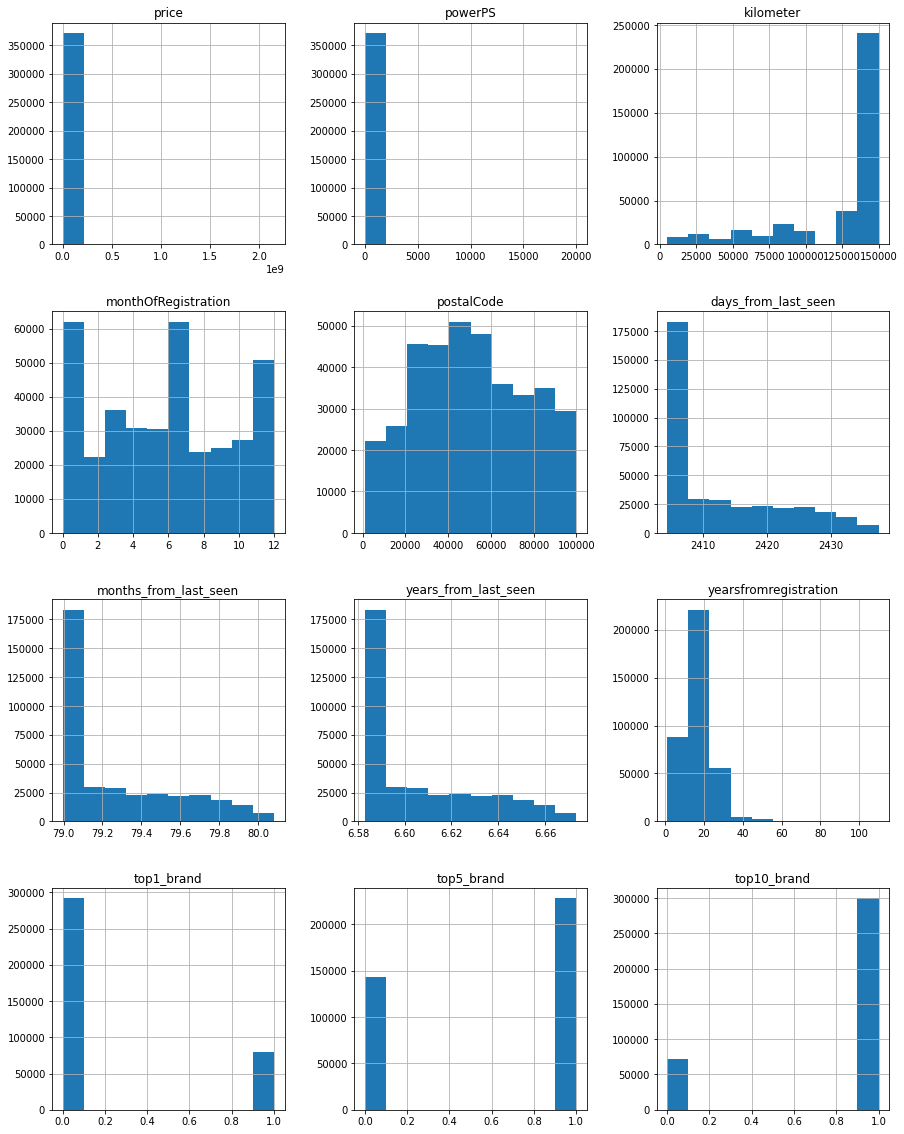

In [73]:
# hist
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

In [74]:
# Pairplot
# sns.set()
# sns.pairplot(df[col_num+['price']], size = 2.5)
# plt.show()

Data is noisy

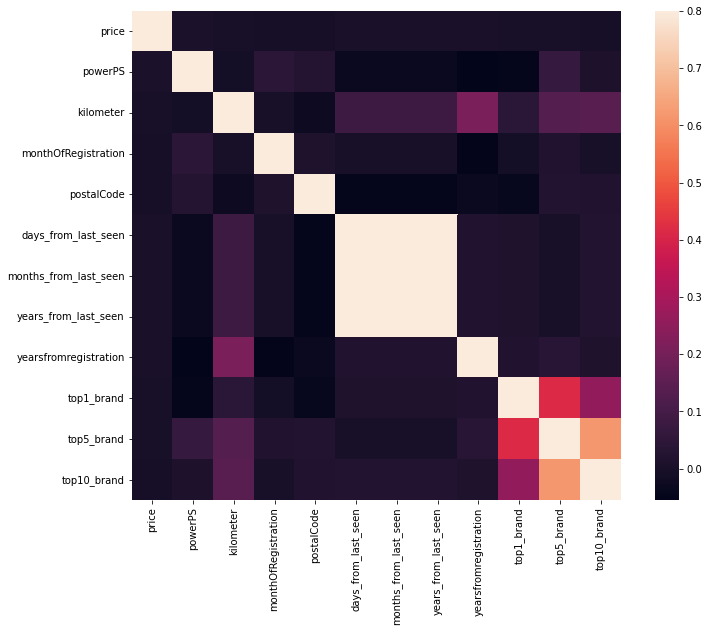

In [75]:
# correlation
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [76]:
df.corr()

,price,powerPS,kilometer,monthOfRegistration,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
price,1.000000,0.006864,-0.000643,-0.002830,-0.003177,0.001703,0.001703,0.001703,0.002416,-0.000417,-0.001445,-0.003403
powerPS,0.006864,1.000000,-0.010921,0.044223,0.026948,-0.029574,-0.029574,-0.029574,-0.055334,-0.047685,0.067682,0.010763
kilometer,-0.000643,-0.010921,1.000000,0.000072,-0.027079,0.082952,0.082952,0.082952,0.210214,0.038678,0.133512,0.143103
monthOfRegistration,-0.002830,0.044223,0.000072,1.000000,0.014762,-0.001361,-0.001361,-0.001361,-0.051928,-0.009150,0.018741,0.001176
postalCode,-0.003177,0.026948,-0.027079,0.014762,1.000000,-0.046865,-0.046865,-0.046865,-0.031975,-0.040881,0.024230,0.021509
days_from_last_seen,0.001703,-0.029574,0.082952,-0.001361,-0.046865,1.000000,1.000000,1.000000,0.018352,0.013563,0.000949,0.023812
months_from_last_seen,0.001703,-0.029574,0.082952,-0.001361,-0.046865,1.000000,1.000000,1.000000,0.018352,0.013563,0.000949,0.023812
years_from_last_seen,0.001703,-0.029574,0.082952,-0.001361,-0.046865,1.000000,1.000000,1.000000,0.018352,0.013563,0.000949,0.023812
yearsfromregistration,0.002416,-0.055334,0.210214,-0.051928,-0.031975,0.018352,0.018352,0.018352,1.000000,0.018744,0.035113,0.013504
top1_brand,-0.000417,-0.047685,0.038678,-0.009150,-0.040881,0.013563,0.013563,0.013563,0.018744,1.000000,0.413735,0.256026


## Check target "price"

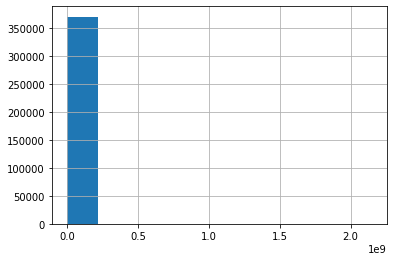

In [77]:
df["price"].hist();

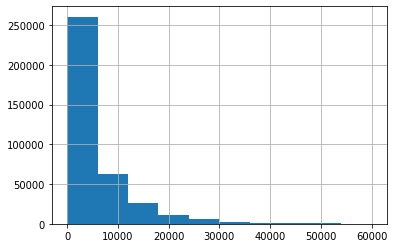

In [78]:
df[df['price'] < 6*10**4]['price'].hist();

In [79]:
df = df[(df['price'] > 0) & (df['price'] < 5*10**4)]

print(df.shape)
df.head()

(358799, 17)


,price,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
0,480.0,unknown,manuell,0.0,golf,150000.0,0,benzin,volkswagen,70435,2404.863229,79.011503,6.584292,27,1,1,1
1,18300.0,coupe,manuell,190.0,unknown,125000.0,5,diesel,audi,66954,2404.925810,79.013559,6.584463,9,0,1,1
2,1500.0,kleinwagen,manuell,75.0,golf,150000.0,6,benzin,volkswagen,91074,2425.263692,79.681757,6.640146,19,1,1,1
3,3600.0,kleinwagen,manuell,69.0,fabia,90000.0,7,diesel,skoda,60437,2405.571285,79.034766,6.586230,12,0,0,0
4,650.0,limousine,manuell,102.0,3er,150000.0,10,benzin,bmw,33775,2405.196447,79.022450,6.585204,25,0,1,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


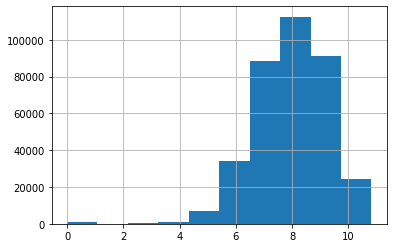

In [80]:
# Log(target)

df['log_price'] = np.log(df['price'])

df['log_price'].hist();

Normall dist!) 

## vehicleType column

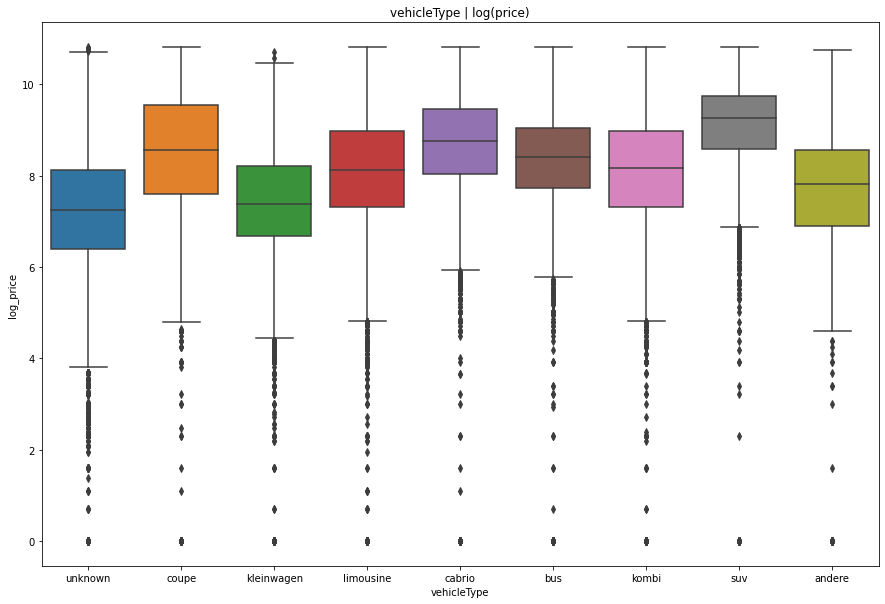

In [81]:
# vehicleType / price
plt.figure(figsize=(15,10)) 
plt.title(u'vehicleType | log(price)')
sns.boxplot(x="vehicleType", y="log_price", data=df); 

## powerPS column

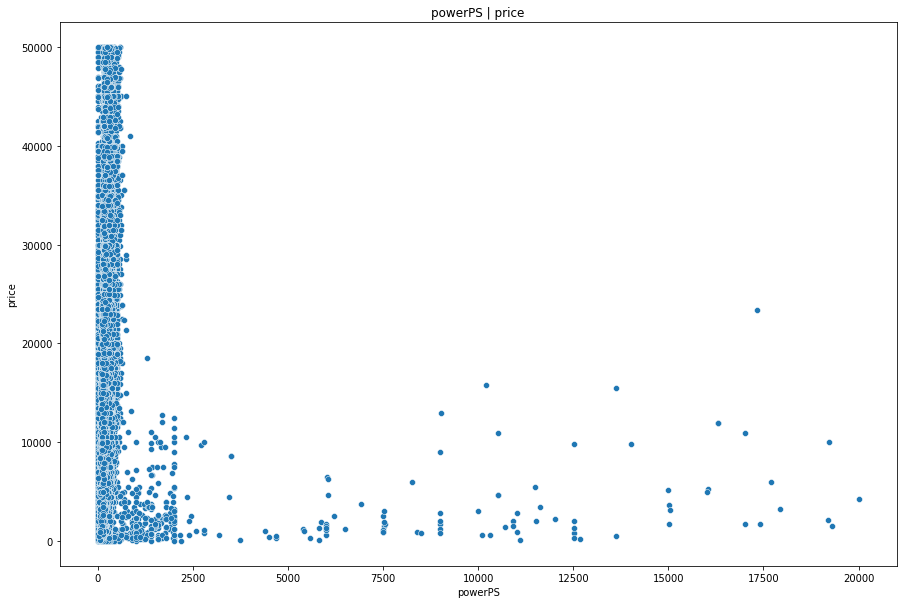

In [82]:
# powerPS / price
plt.figure(figsize=(15,10)) 
plt.title(u'powerPS | price')
sns.scatterplot(x="powerPS", y="price", data=df); 

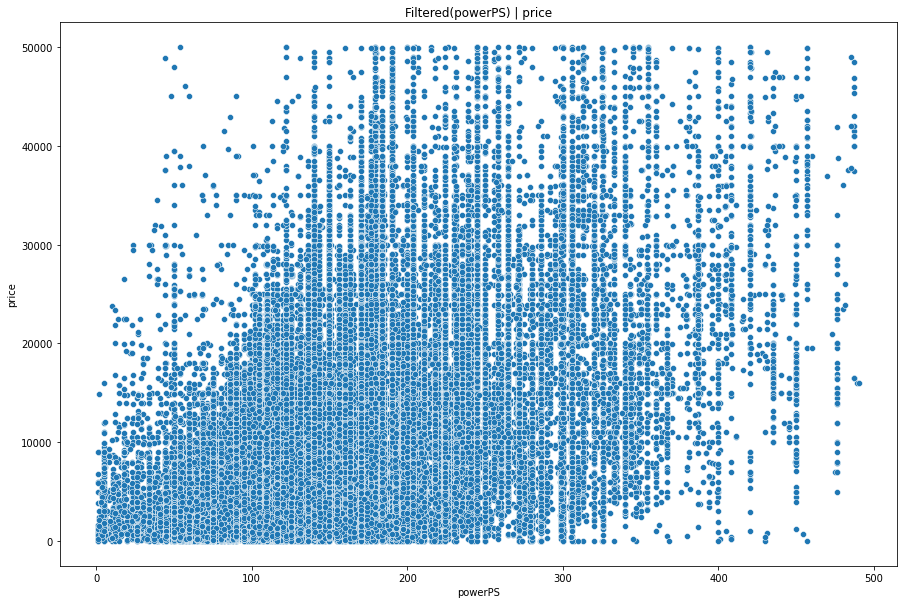

In [83]:
# Filtered(powerPS) / price
plt.figure(figsize=(15,10)) 
plt.title(u'Filtered(powerPS) | price')
sns.scatterplot(x="powerPS", y="price", data=df[(df['powerPS'] > 0) & (df['powerPS'] < 500)]); 

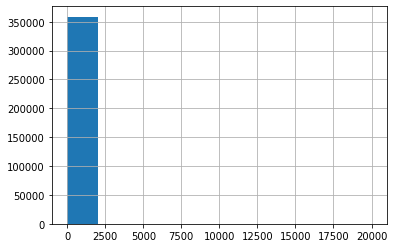

In [84]:
df['powerPS'].hist();

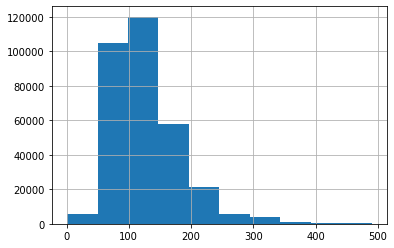

In [85]:
df[(df['powerPS'] > 0) & (df['powerPS'] < 500)]['powerPS'].hist();

In [86]:
# Remove outliers in "powerPS"
df = df[(df['powerPS'] > 0) & (df['powerPS'] < 500)]
print(df.shape)
df.head()

(321434, 18)


,price,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand,log_price
1,18300.0,coupe,manuell,190.0,unknown,125000.0,5,diesel,audi,66954,2404.925810,79.013559,6.584463,9,0,1,1,9.814656
2,1500.0,kleinwagen,manuell,75.0,golf,150000.0,6,benzin,volkswagen,91074,2425.263692,79.681757,6.640146,19,1,1,1,7.313220
3,3600.0,kleinwagen,manuell,69.0,fabia,90000.0,7,diesel,skoda,60437,2405.571285,79.034766,6.586230,12,0,0,0,8.188689
4,650.0,limousine,manuell,102.0,3er,150000.0,10,benzin,bmw,33775,2405.196447,79.022450,6.585204,25,0,1,1,6.476972
5,2200.0,cabrio,manuell,109.0,2_reihe,150000.0,8,benzin,peugeot,67112,2406.237049,79.056639,6.588053,16,0,0,1,7.696213


## yearsfromregistration column

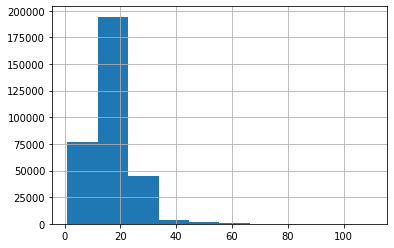

In [87]:
df['yearsfromregistration'].hist();

# Data preparation for model

In [88]:
get_info(df)

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,4866,float64
1,vehicleType,0,9,object
2,gearbox,0,3,object
3,powerPS,0,434,float64
4,model,0,252,object
5,kilometer,0,13,float64
6,monthOfRegistration,0,13,int64
7,fuelType,0,8,object
8,brand,0,40,object
9,postalCode,0,8131,int64


In [89]:
df_model = df.copy()

In [90]:
df_model.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand,log_price
1,18300.0,coupe,manuell,190.0,unknown,125000.0,5,diesel,audi,66954,2404.925810,79.013559,6.584463,9,0,1,1,9.814656
2,1500.0,kleinwagen,manuell,75.0,golf,150000.0,6,benzin,volkswagen,91074,2425.263692,79.681757,6.640146,19,1,1,1,7.313220
3,3600.0,kleinwagen,manuell,69.0,fabia,90000.0,7,diesel,skoda,60437,2405.571285,79.034766,6.586230,12,0,0,0,8.188689
4,650.0,limousine,manuell,102.0,3er,150000.0,10,benzin,bmw,33775,2405.196447,79.022450,6.585204,25,0,1,1,6.476972
5,2200.0,cabrio,manuell,109.0,2_reihe,150000.0,8,benzin,peugeot,67112,2406.237049,79.056639,6.588053,16,0,0,1,7.696213


In [91]:
get_info(df_model)

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,4866,float64
1,vehicleType,0,9,object
2,gearbox,0,3,object
3,powerPS,0,434,float64
4,model,0,252,object
5,kilometer,0,13,float64
6,monthOfRegistration,0,13,int64
7,fuelType,0,8,object
8,brand,0,40,object
9,postalCode,0,8131,int64


In [92]:
# Categorical features 
cat_features = df_model.columns[df_model.dtypes == 'object'].tolist()
cat_features

['vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

In [93]:
# Numerical features

numerical_feature = df_model.columns[df_model.dtypes != 'object'].tolist()
numerical_feature.remove('price')
numerical_feature.remove('log_price')
numerical_feature


['powerPS',
 'kilometer',
 'monthOfRegistration',
 'postalCode',
 'days_from_last_seen',
 'months_from_last_seen',
 'years_from_last_seen',
 'yearsfromregistration',
 'top1_brand',
 'top5_brand',
 'top10_brand']

In [94]:
# One Hot Encoding
df_concat_cat_features = pd.get_dummies(df_model[cat_features])

In [95]:
# Remove categorical features 
df_model.drop(cat_features, axis = 1, inplace = True)

In [96]:
# Join coded categorical features
df_model = pd.concat([df_concat_cat_features, df_model], axis = 1 )

In [97]:
# standardize data
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model[numerical_feature]), columns = numerical_feature)

In [98]:
df_scaled.head()

,powerPS,kilometer,monthOfRegistration,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand
0,1.121037,-0.022200,-0.272333,0.601201,-0.852729,-0.852729,-0.852729,-1.034881,-0.524434,0.779531,0.484775
1,-0.850691,0.619147,0.006257,1.536662,1.390282,1.390282,1.390282,0.362598,1.906818,0.779531,0.484775
2,-0.953564,-0.920086,0.284847,0.348448,-0.781541,-0.781541,-0.781541,-0.615637,-0.524434,-1.282823,-2.062812
3,-0.387763,0.619147,1.120616,-0.685602,-0.822881,-0.822881,-0.822881,1.201085,-0.524434,0.779531,0.484775
4,-0.267745,0.619147,0.563437,0.607329,-0.708116,-0.708116,-0.708116,-0.056646,-0.524434,-1.282823,0.484775


In [99]:
df_model_sc = df_model.drop(columns = numerical_feature) # Delete num features
df_model_sc = pd.concat([df_scaled, df_model], axis = 1)  # Add scaled data

In [100]:
df_model_sc.head()

,powerPS,kilometer,monthOfRegistration,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,...,monthOfRegistration,postalCode,days_from_last_seen,months_from_last_seen,years_from_last_seen,yearsfromregistration,top1_brand,top5_brand,top10_brand,log_price
0,1.121037,-0.022200,-0.272333,0.601201,-0.852729,-0.852729,-0.852729,-1.034881,-0.524434,0.779531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.850691,0.619147,0.006257,1.536662,1.390282,1.390282,1.390282,0.362598,1.906818,0.779531,...,5.0,66954.0,2404.925810,79.013559,6.584463,9.0,0.0,1.0,1.0,9.814656
2,-0.953564,-0.920086,0.284847,0.348448,-0.781541,-0.781541,-0.781541,-0.615637,-0.524434,-1.282823,...,6.0,91074.0,2425.263692,79.681757,6.640146,19.0,1.0,1.0,1.0,7.313220
3,-0.387763,0.619147,1.120616,-0.685602,-0.822881,-0.822881,-0.822881,1.201085,-0.524434,0.779531,...,7.0,60437.0,2405.571285,79.034766,6.586230,12.0,0.0,0.0,0.0,8.188689
4,-0.267745,0.619147,0.563437,0.607329,-0.708116,-0.708116,-0.708116,-0.056646,-0.524434,-1.282823,...,10.0,33775.0,2405.196447,79.022450,6.585204,25.0,0.0,1.0,1.0,6.476972


In [101]:
# Delete Nan rows 
df_model_sc = df_model_sc.dropna()

In [102]:
df_model_sc.shape

(278195, 336)

In [103]:
# clear 
gc.collect()

14514

 ###  Build ML Model

In [104]:
X = df_model_sc.drop(columns = ['price','log_price'])
# y = df_model['price']  
y = df_model_sc['log_price']  

X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.3,random_state=17)

In [105]:
y_train[1]

9.814656338829513

In [106]:
X_train

array([[ 1.70398332,  0.61914736, -0.82951289, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.43521886,  0.61914736,  1.12061633, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.00658222,  0.61914736,  0.28484666, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.14216397,  0.61914736,  0.56343655, ...,  0.        ,
         1.        ,  1.        ],
       [-1.10787304,  0.61914736, -0.82951289, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26376421,  0.61914736,  1.67779611, ...,  0.        ,
         0.        ,  1.        ]])

#### Models


In [107]:
def best_model_m (X, y, inmodel):
    # X = df.drop(columns = ['price', 'log_price'])
    # # y = df['price'] 
    # y = df['log_price'] 
    
    X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.3,random_state=17)
    
    if inmodel == 'LinearRegression':      
      # LinearRegression
      model = LinearRegression()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)

    if inmodel == 'Ridge':
      # Ridge
      model = Ridge()
      model_params = {'alpha': np.arange(1,4,0.1),'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)
    
    if inmodel == 'Lasso':
      # Lasso
      model = Lasso()
      model_params = {'alpha': np.arange(1,4,0.1), 'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)              
    
    if inmodel == 'RidgeCV':
      # RidgeCV
      model = RidgeCV()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)

    if inmodel == 'LassoCV':
      # LassoCV
      model = LassoCV()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train) 
    
    if inmodel == 'RFR':  
      # RFR 
      model = RandomForestRegressor()
      model_params = {'max_depth': range(1,3)#,
                      #'max_features': range(1,20)
                      } # по кол-ву признаков
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)
      model_grid.fit(X_train, y_train)
    
    if inmodel == 'GRB':  
      # GRB
      model = GradientBoostingRegressor()
      model_params = {'loss': ['ls', 'lad']} 
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)
      model_grid.fit(X_train, y_train)
        
    result=pd.DataFrame()    
    result=pd.DataFrame({
                        "Best parameters":model_grid.best_params_,
                        "RMSE": np.sqrt(mean_squared_error(y_holdout,model_grid.predict(X_holdout))),
                        "Score model": model_grid.best_score_,
                        "Method": str(type(model)).split('.')[-1].replace("'>",'') 
                       }) 
    return result

In [108]:
best_model_m(X, y,'LinearRegression')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


,Best parameters,RMSE,Score model,Method
normalize,False,58.205217,-173.612914,LinearRegression


In [109]:
best_model_m(X, y,'Ridge')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


,Best parameters,RMSE,Score model,Method
alpha,1.0,0.744733,0.648086,Ridge
normalize,False,0.744733,0.648086,Ridge


In [ ]:
# best_model_m(X, y,'GRB')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [110]:
# best_model_m(df_model,'RFR')

In [112]:
# best_model_m(df_model,'RidgeCV')

In [113]:
# best_model_m(df_model,'Lasso')

In [114]:
# best_model_m(df_model,'LassoCV')